In [1]:
from music21 import *

n = note.Note()
s1 = stream.Stream(id='s1')
s2 = stream.Stream(id='s2')
s1.insert(10, n)
s2.insert(20, n)
# Sites where the objects are stored
for s in n.sites:
    print(s, s.elementOffset(n))


<music21.stream.Stream s1> 10.0
<music21.stream.Stream s2> 20.0


In [3]:
c = note.Note('C4')
print(c.derivation)
f = c.transpose('P4')
print(f)
f.derivation


<Derivation of <music21.note.Note C> from None via "None">
<music21.note.Note F>


<Derivation of <music21.note.Note F> from <music21.note.Note C> via "transpose">

In [4]:
c.pitch.accidental = pitch.Accidental('sharp')
(c, f)

(<music21.note.Note C#>, <music21.note.Note F>)

In [5]:
f.notehead = 'diamond'
for n in f.derivation.chain():
    n.notehead = 'diamond'

(f.notehead, c.notehead)

('diamond', 'diamond')

7
1.0 0.5


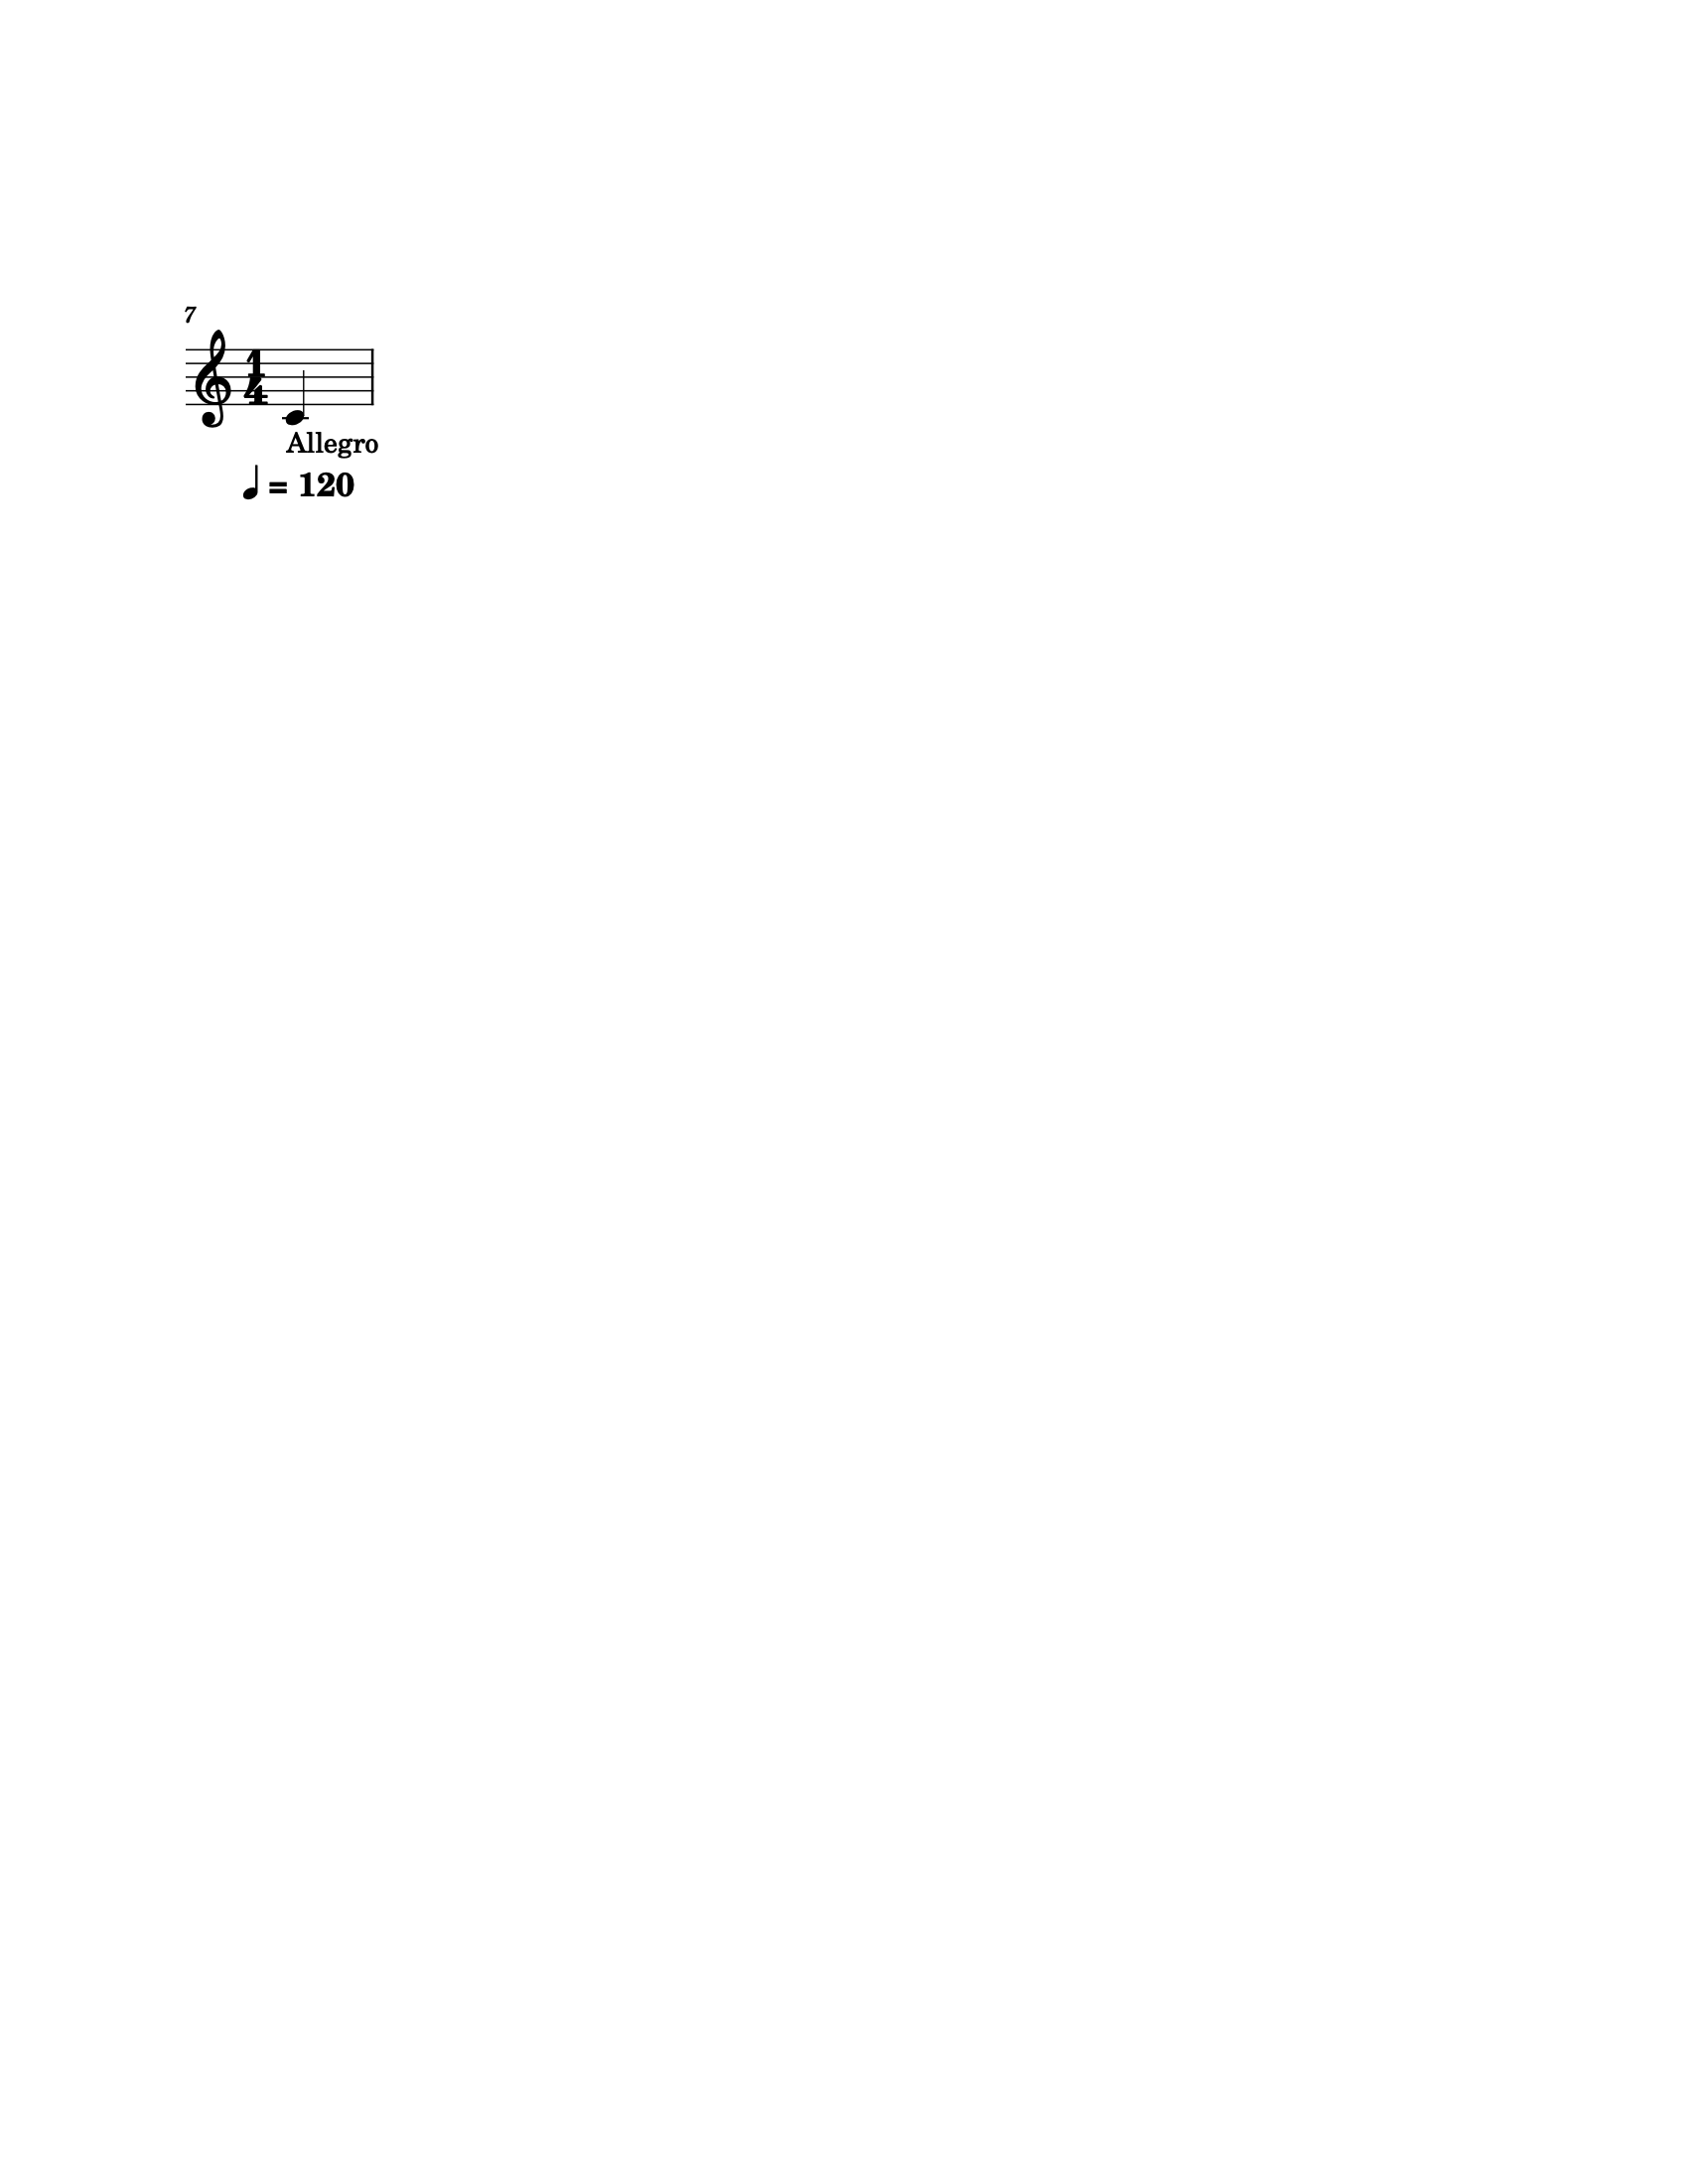

In [2]:
n = note.Note('C')
m = stream.Measure()
m.number = 7
m.append(n)
print(n.measureNumber)
m.insert(0, tempo.MetronomeMark('Allegro', 120))
print (n.quarterLength, n.seconds)
m.show()


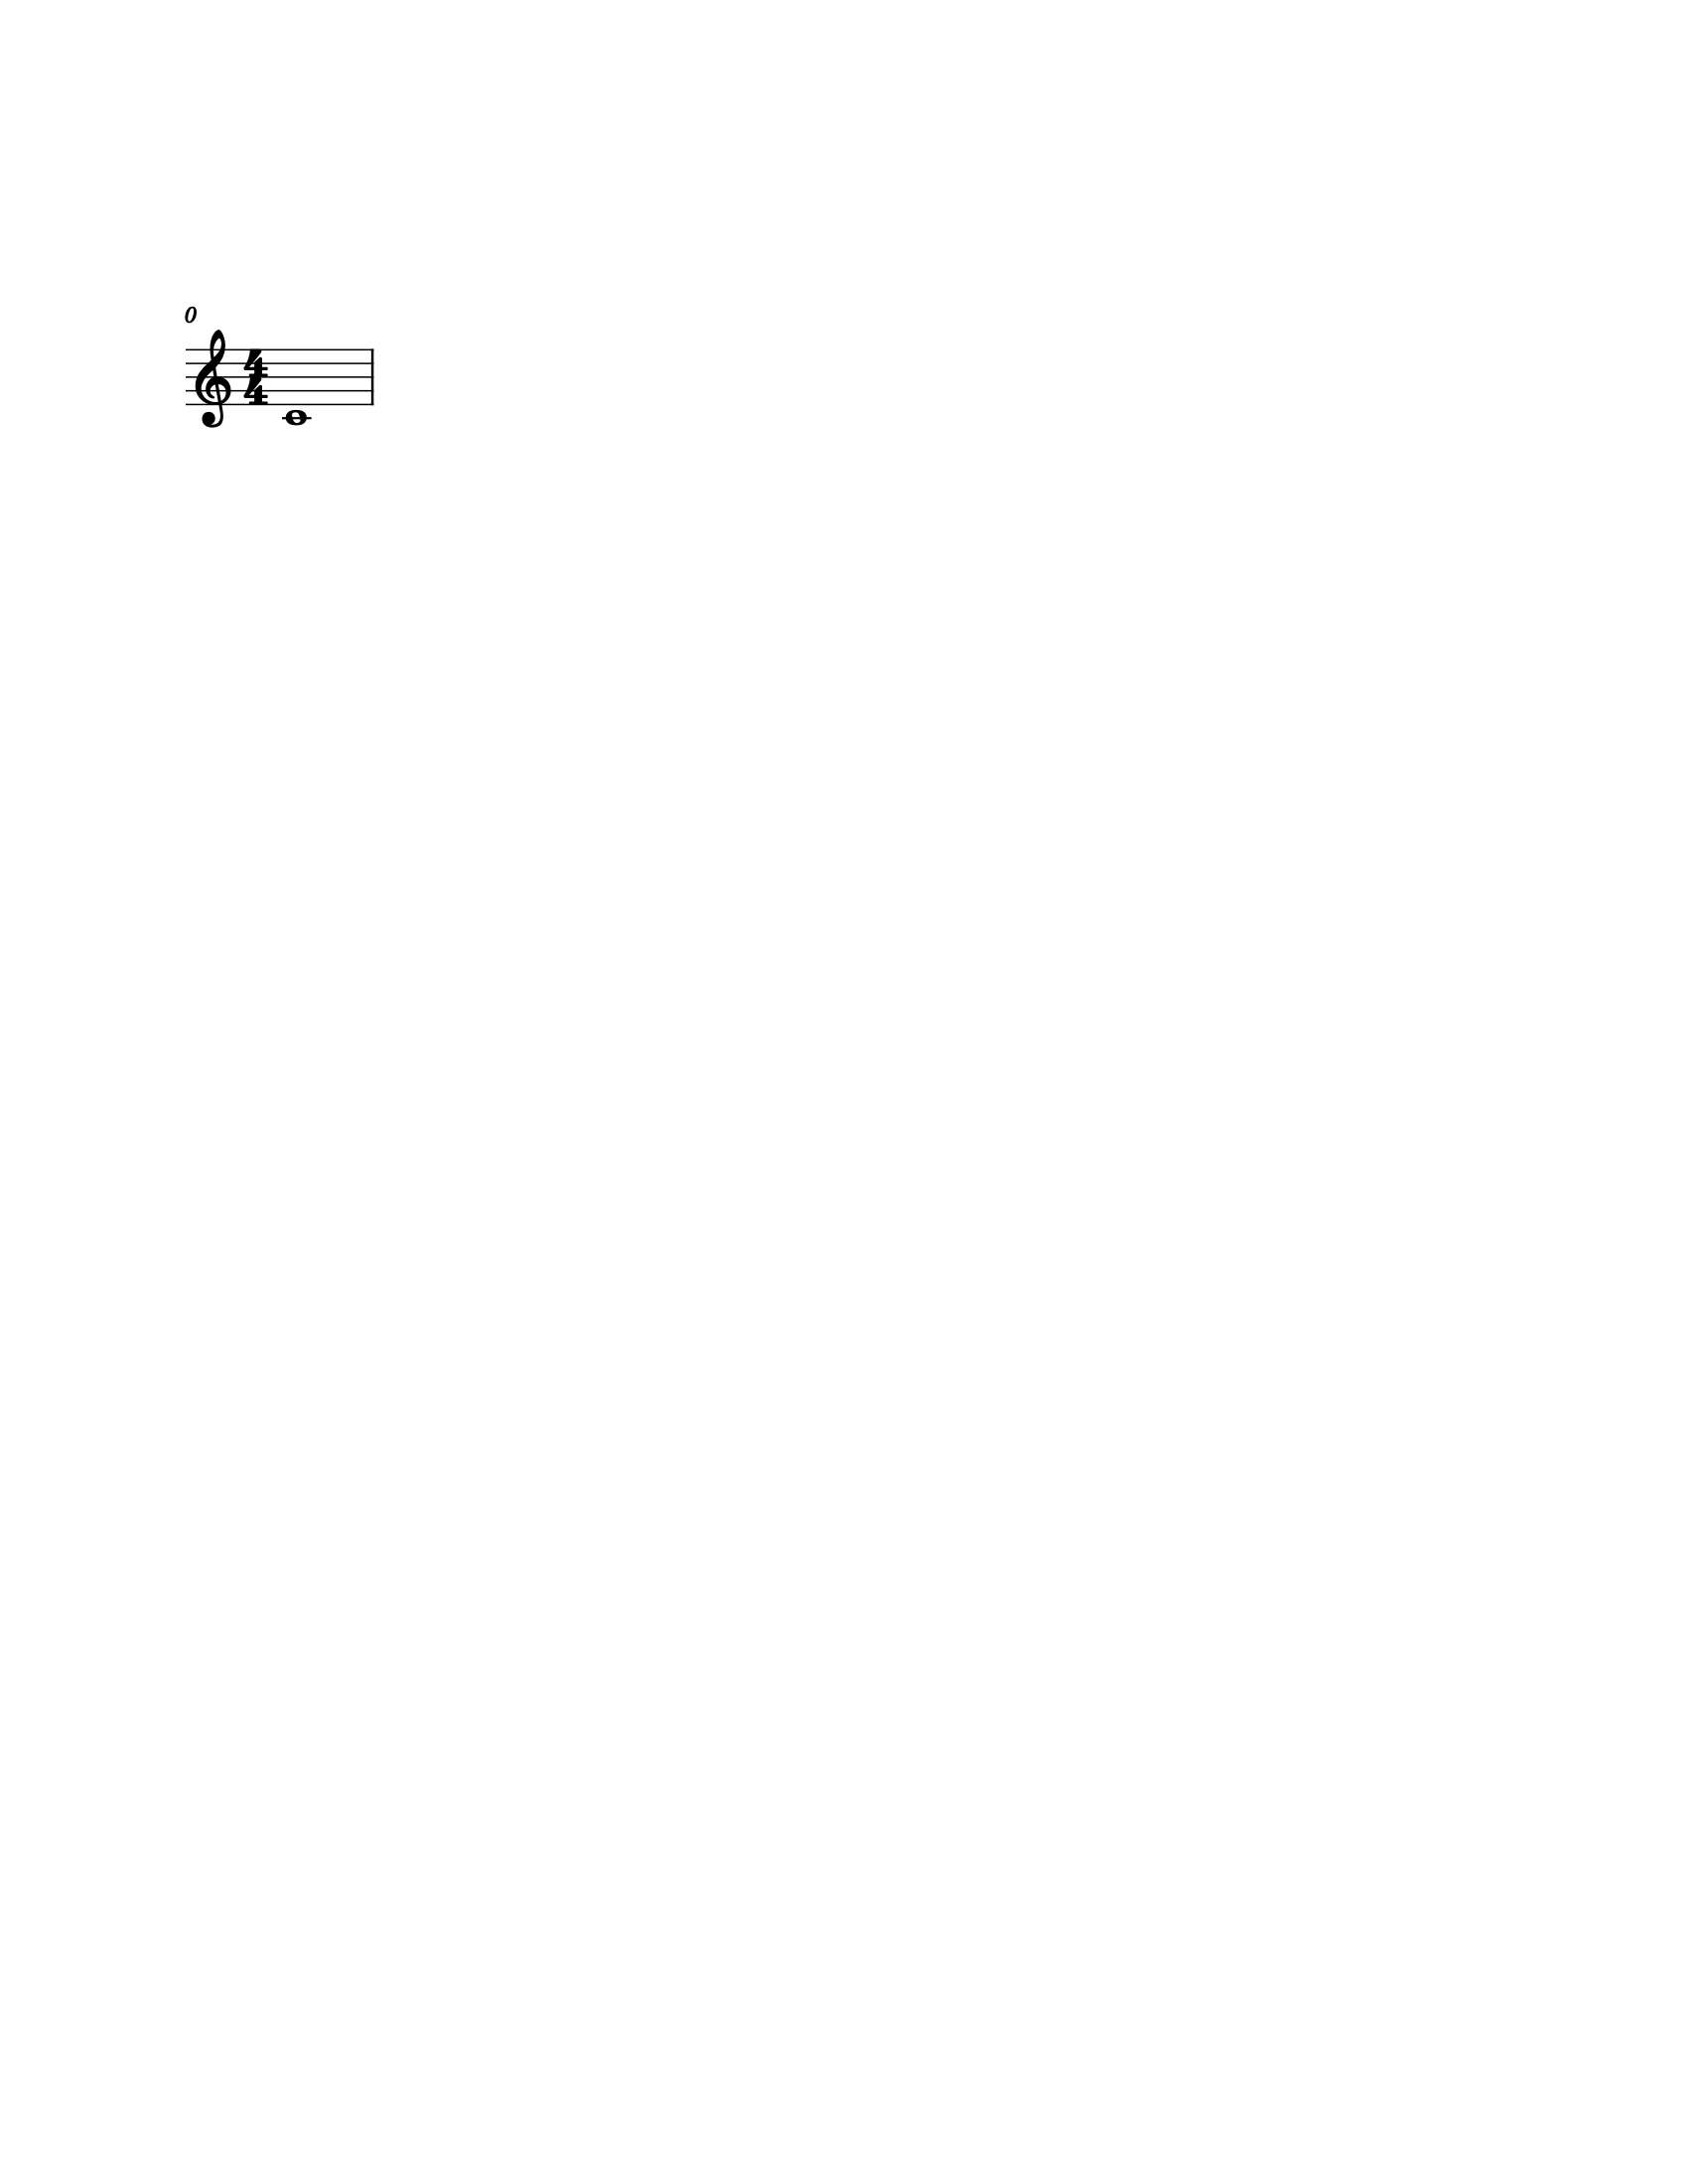

In [22]:
s3 = stream.Measure()
n3 = note.Note(type='whole')
s3.append(n3)
rb = bar.Barline()
s3.rightBarline = rb
rb.getOffsetBySite(s3)
s3.show()

In [9]:
m = stream.Measure()
v = stream.Voice()
n2 = note.Note('D')
v.append(n2)
m.insert(0, v)
n2.measureNumber
m.insert(0, tempo.MetronomeMark('Allegro', 120))
print(n2.quarterLength, n2.seconds)
print(n2.seconds)
m.show("text")
n3 = note.Note()
n3.measureNumber is None

1.0 0.5
0.5
{0.0} <music21.tempo.MetronomeMark Allegro Quarter=120>
{0.0} <music21.stream.Voice 0x11840fdc0>
    {0.0} <music21.note.Note D>


True

In [11]:
m.insert(0, tempo.MetronomeMark('Allegro', 120))
print (n2.quarterLength, n2.seconds)

1.0 0.5


In [12]:
gloria = corpus.parse('luca/gloria')
soprano = gloria.parts[0]

lastTimeSignature = None
for n in soprano.recurse().getElementsByClass(note.Note):
    thisTimeSignature = n.getContextByClass(meter.TimeSignature)
    if thisTimeSignature is not lastTimeSignature:
        lastTimeSignature = thisTimeSignature
        print(thisTimeSignature, n.measureNumber)

<music21.meter.TimeSignature 6/8> 1
<music21.meter.TimeSignature 2/4> 28
<music21.meter.TimeSignature 6/8> 80
<music21.meter.TimeSignature 3/4> 110


In [14]:
lastTimeSignature = None
for n in soprano.flat.notes:
    thisTimeSignature = n.getContextByClass('TimeSignature')
    if thisTimeSignature is not lastTimeSignature:
        lastTimeSignature = thisTimeSignature
        print(thisTimeSignature, n.measureNumber)

<music21.meter.TimeSignature 6/8> 1
<music21.meter.TimeSignature 2/4> 28
<music21.meter.TimeSignature 6/8> 80
<music21.meter.TimeSignature 3/4> 110


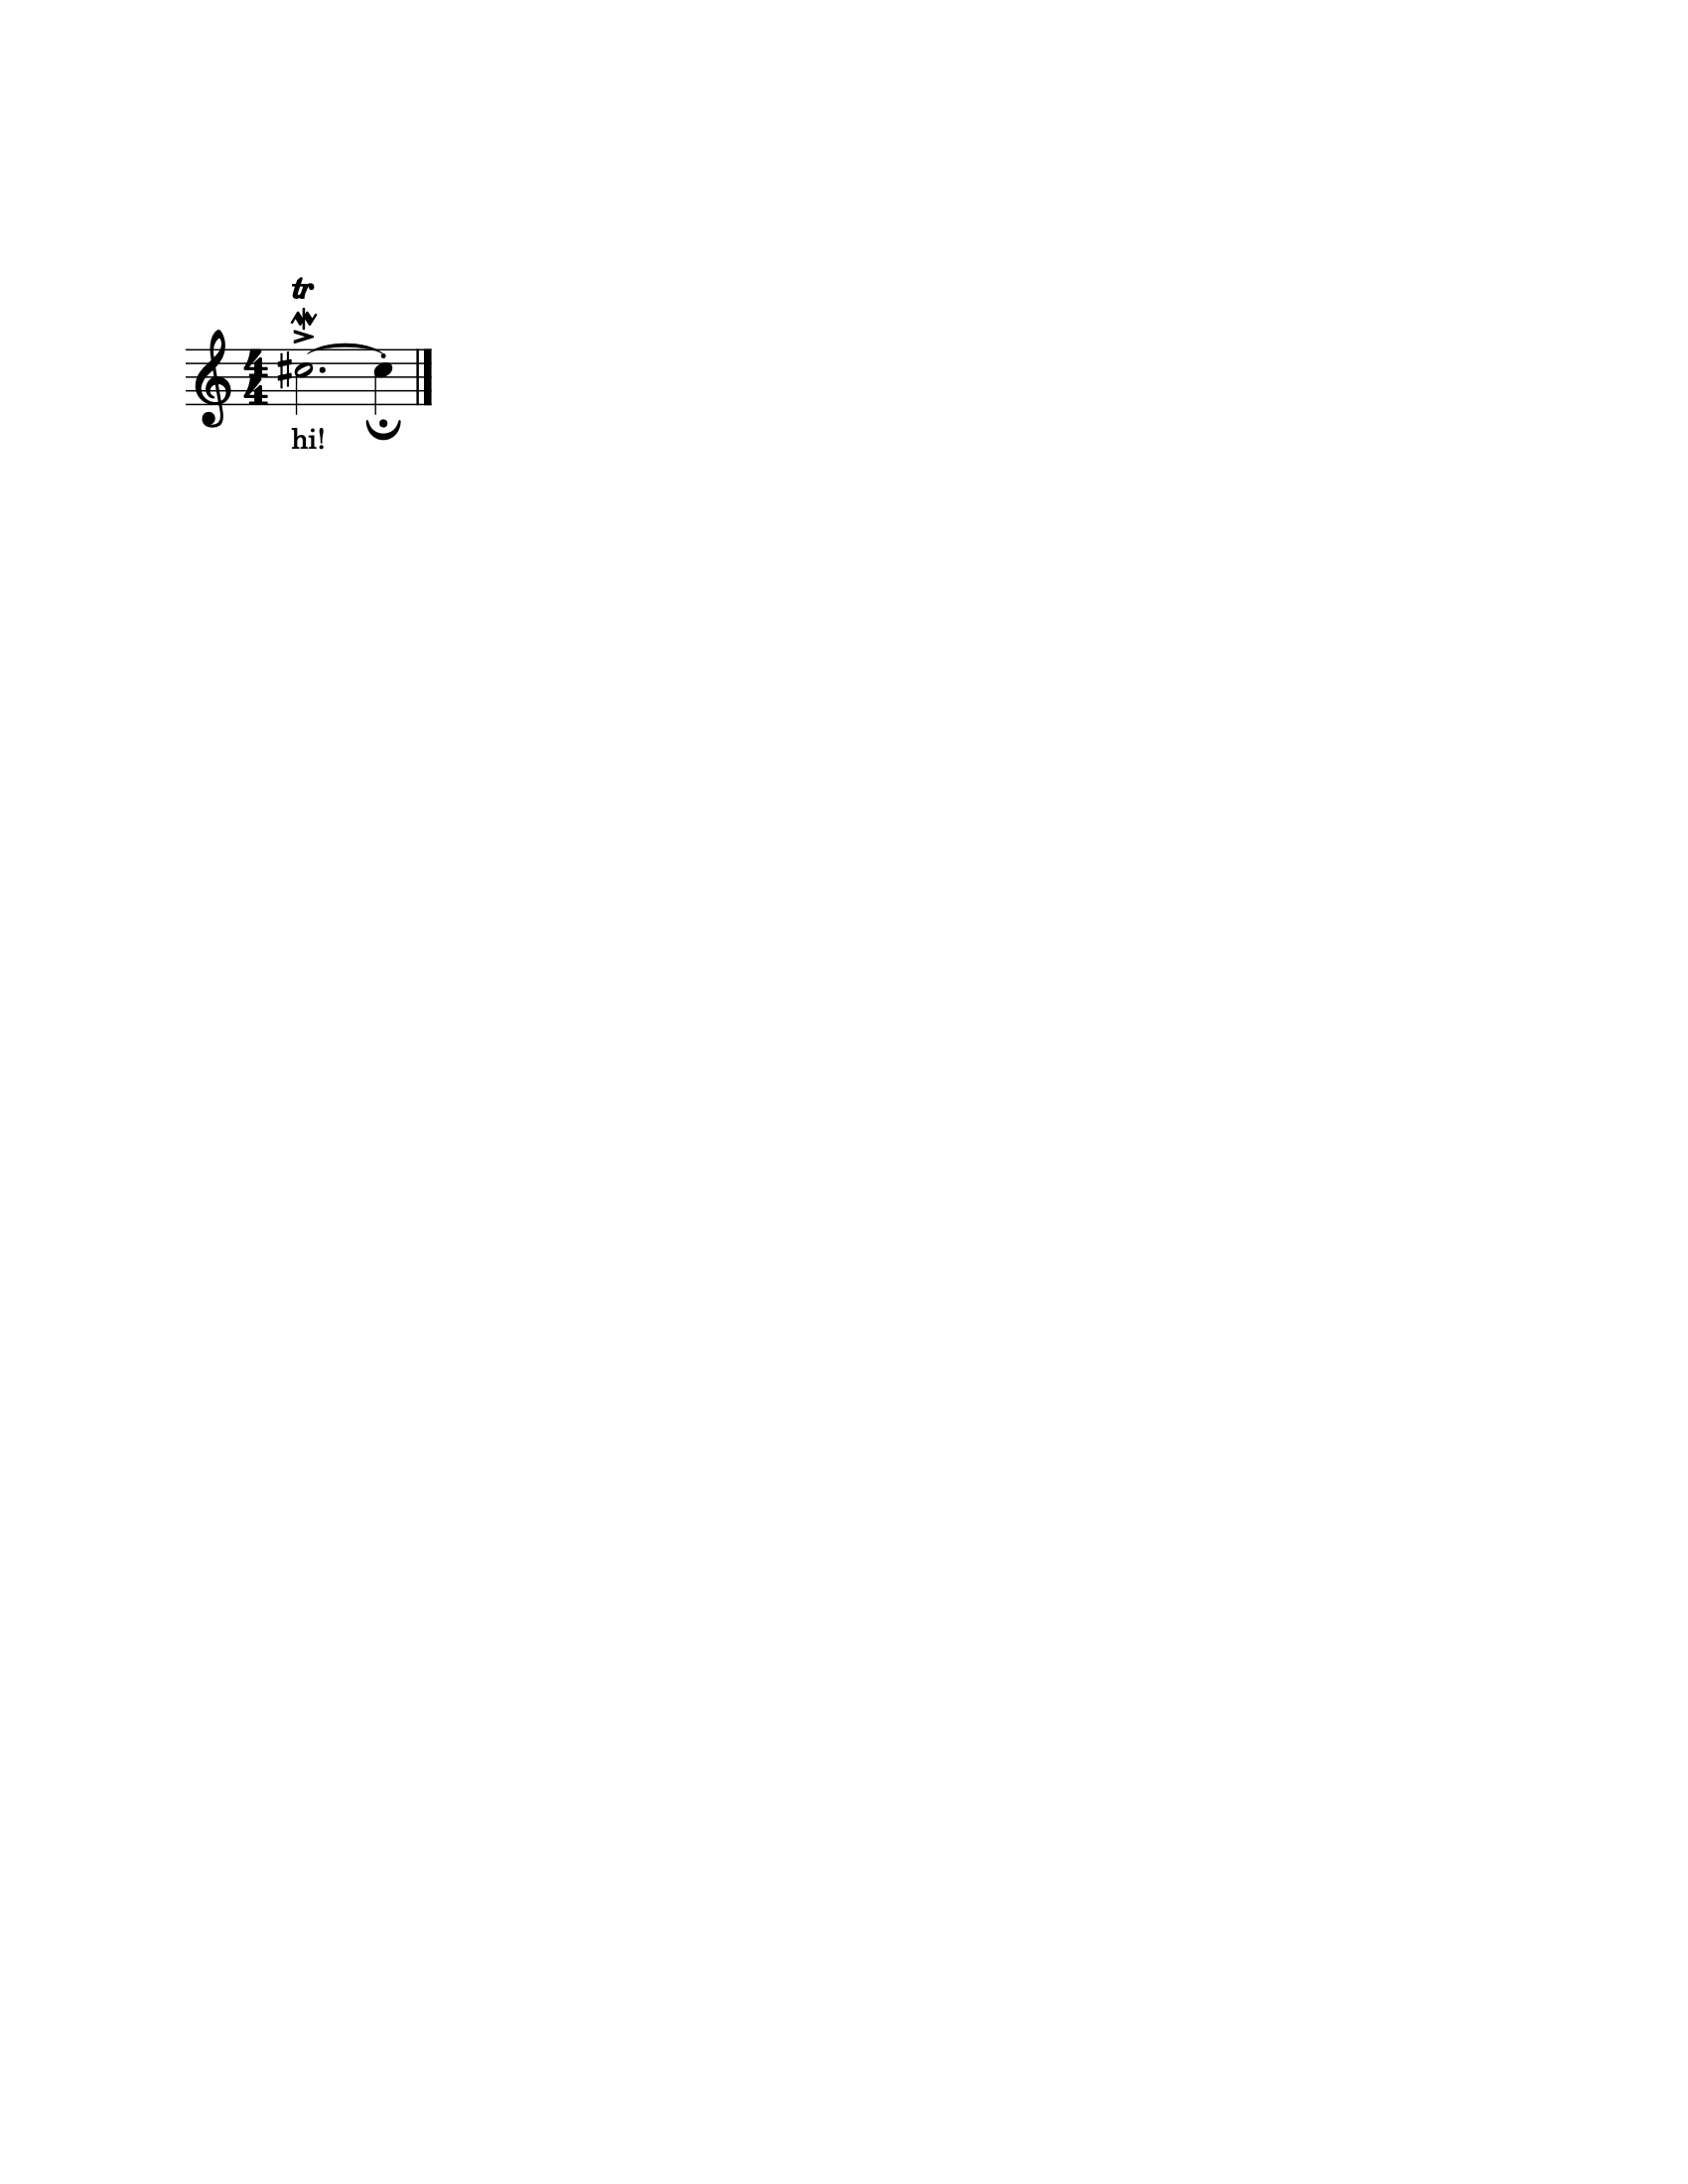

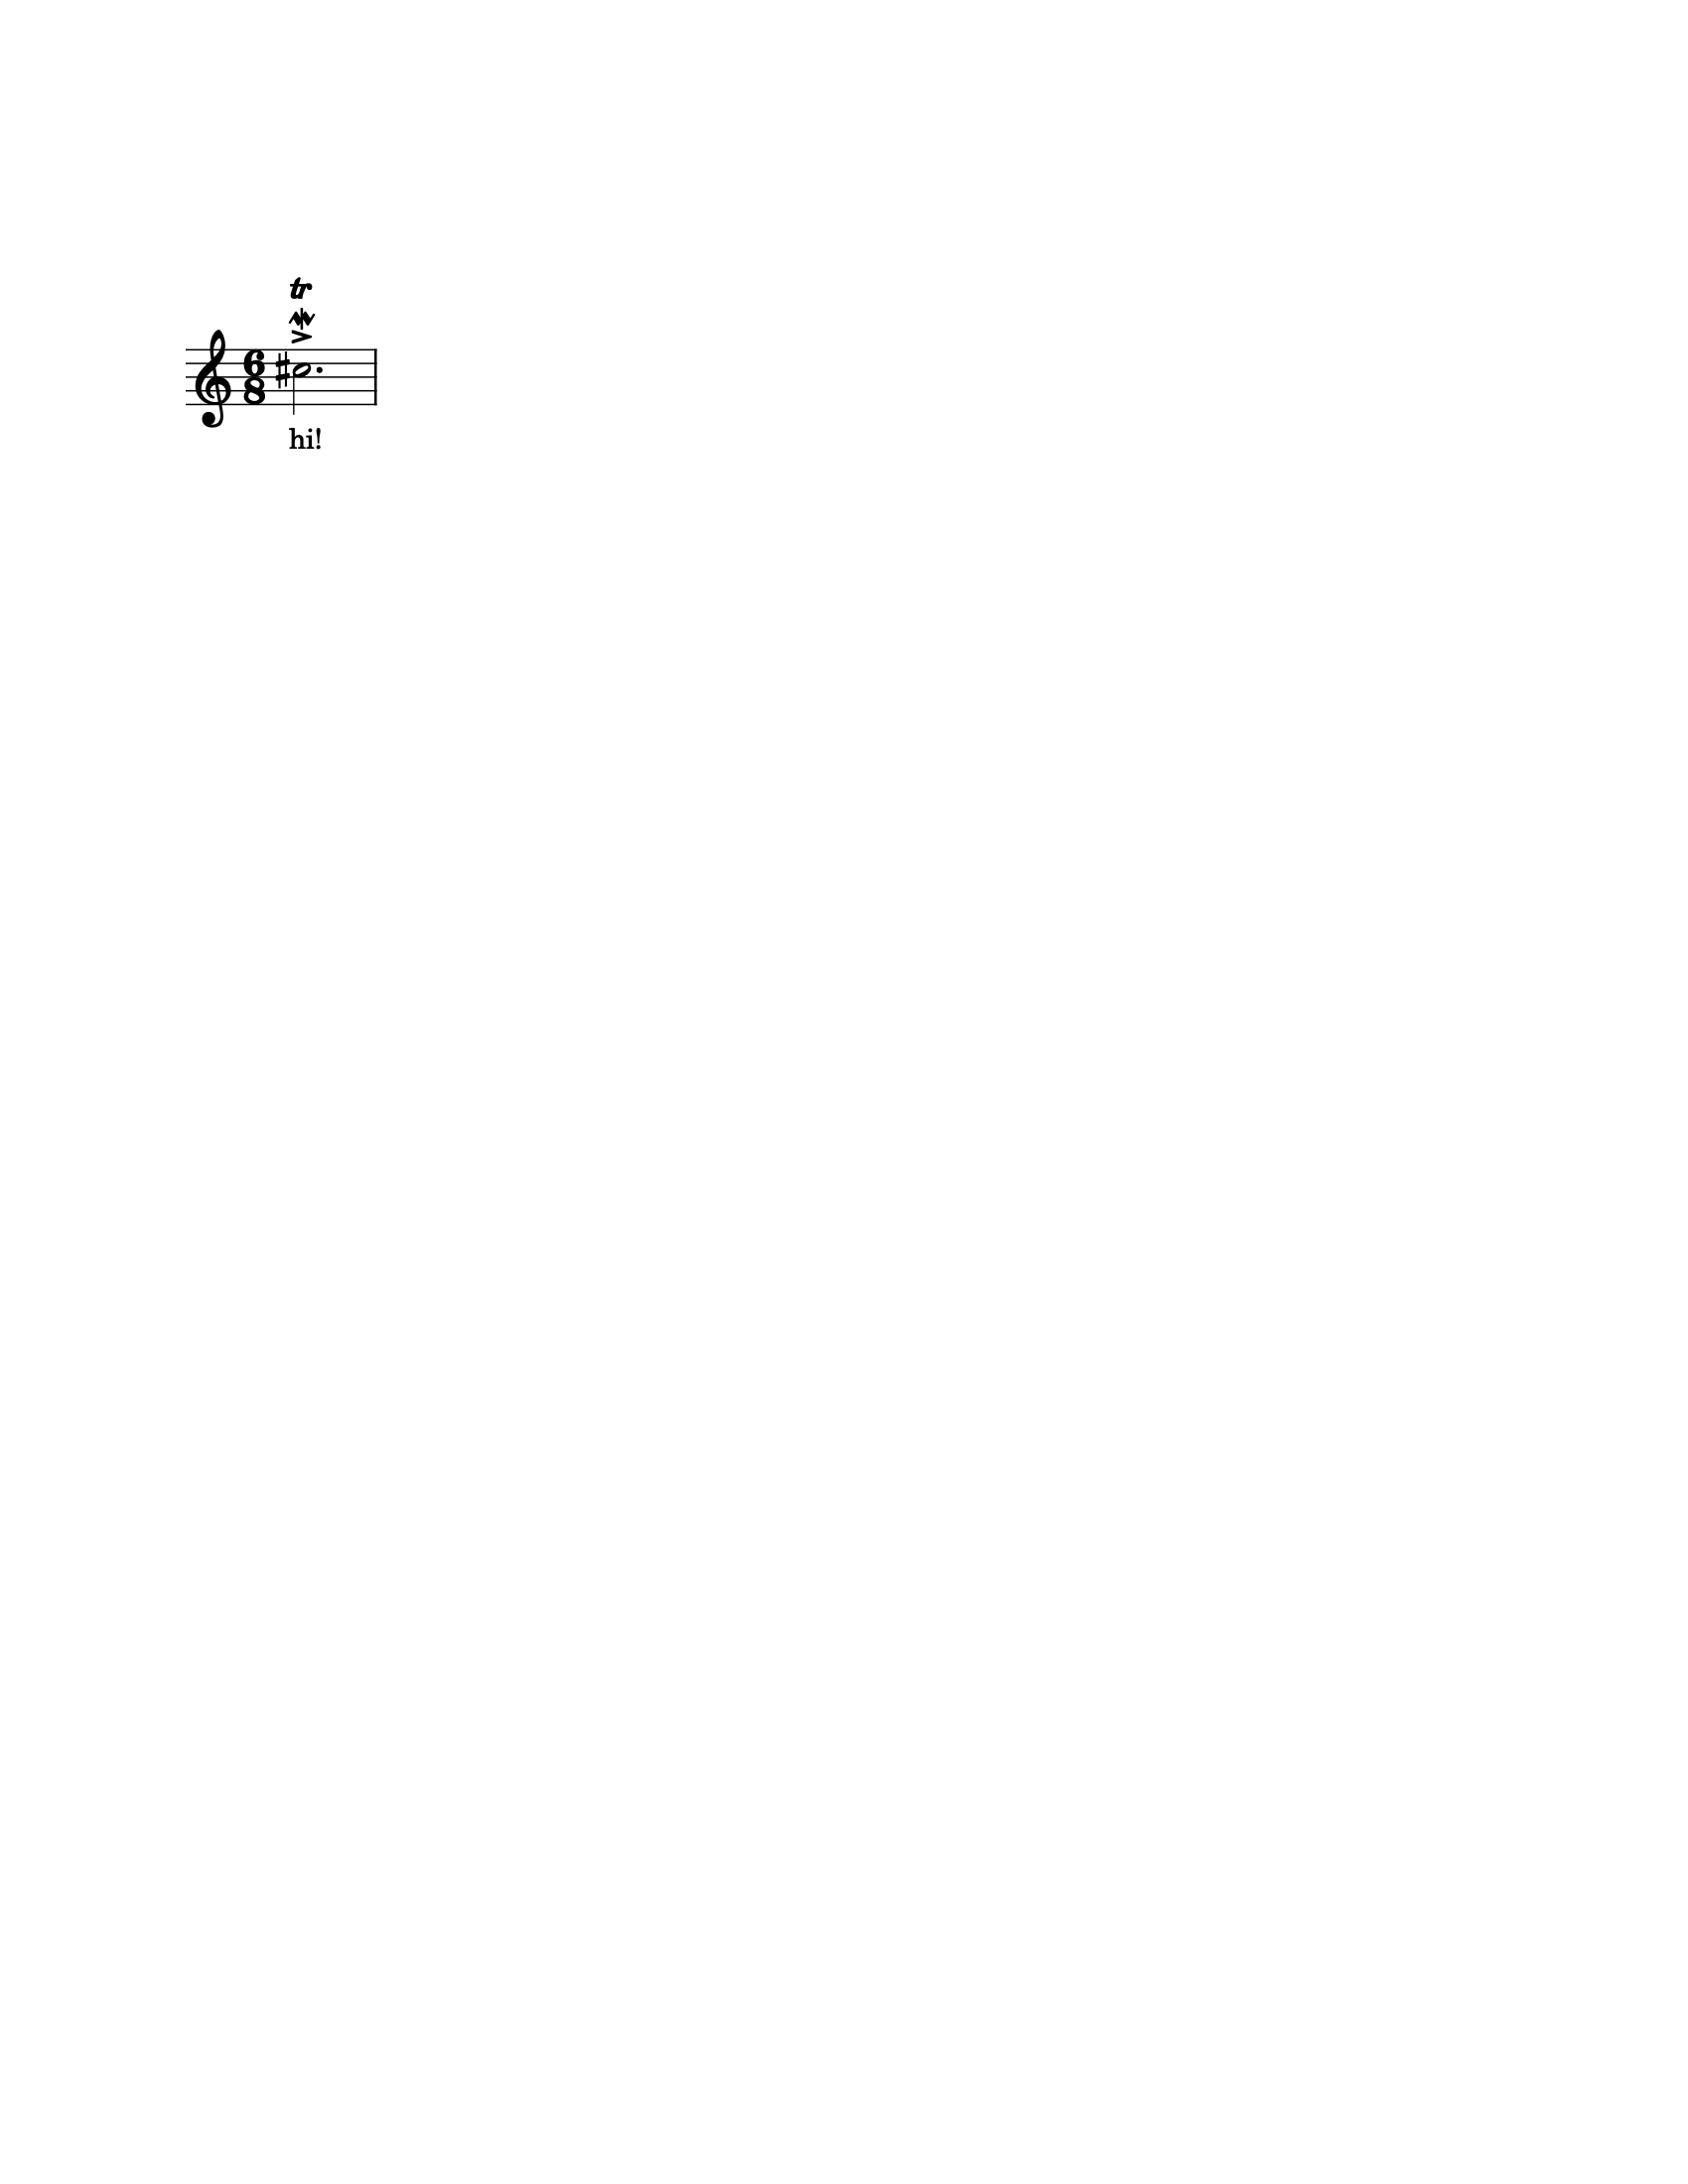

In [18]:
n = note.Note('C#5')
n.duration.type = 'whole'
n.articulations = [articulations.Staccato(), articulations.Accent()]
n.lyric = 'hi!'
n.expressions = [expressions.Mordent(), expressions.Trill(), expressions.Fermata()]
splitTuple = n.splitAtQuarterLength(3.0)
s = stream.Stream()
s.append(splitTuple)
s.show()
n.show()

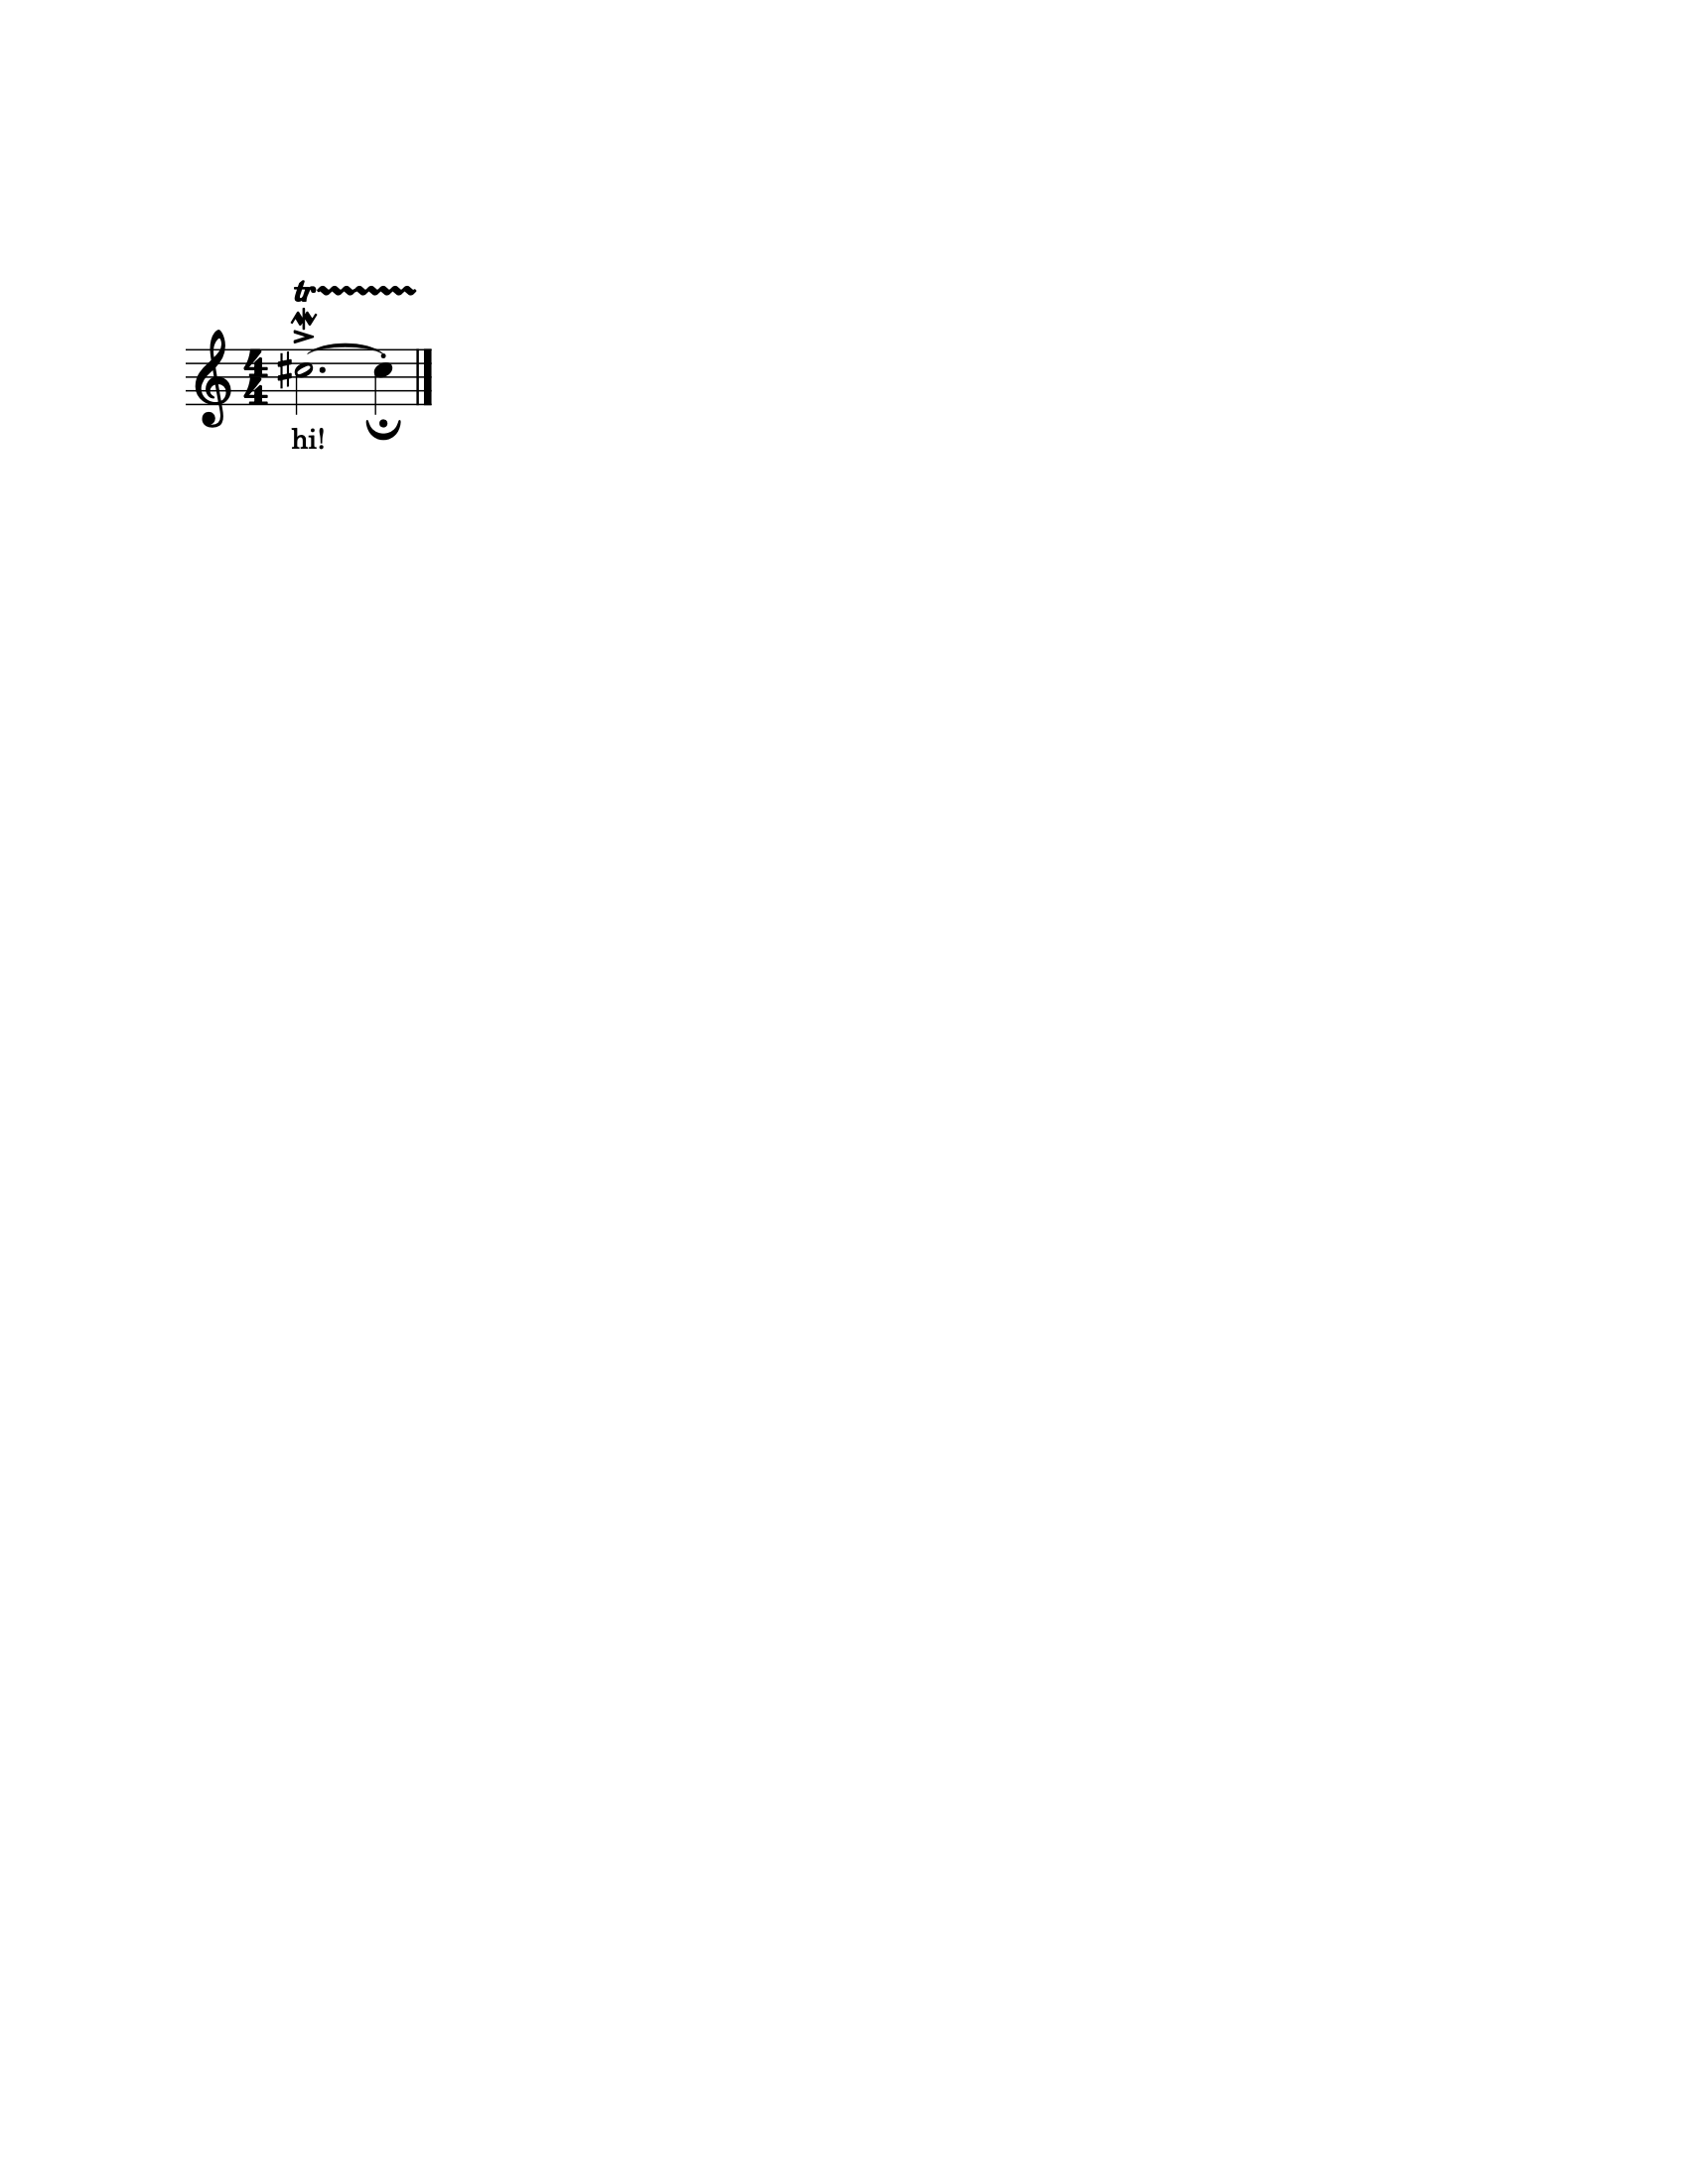

In [19]:
for thisSpanner in splitTuple.spannerList:
    s.insert(0, thisSpanner)
s.show()